In [116]:
#Teste de web scraping

In [117]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [118]:
url = 'https://pt.wikipedia.org/wiki/Lista_de_pa%C3%ADses_por_PIB_(Paridade_do_Poder_de_Compra)_per_capita'

dados = pd.read_html(url)

In [119]:
len(dados)

9

In [120]:
tabela1 = dados[2]
tabela1

,Posição,País,Int$,Ano
0,1,Catar,140649,2014
1,—,Macau,139767,2014
2,2,Luxemburgo,98460,2014
3,3,Singapura,82763,2014
4,4,Kuwait,73246,2014
...,...,...,...,...
188,179,Libéria,842,2014
189,180,Malawi,822,2014
190,181,Burundi,770,2014
191,182,República Democrática do Congo,746,2014


In [121]:
tabela1.shape

(193, 4)

In [122]:
tabela1.isnull().sum()

Posição    0
País       0
Int$       0
Ano        0
dtype: int64

In [123]:
tabela1.isna().sum()

Posição    0
País       0
Int$       0
Ano        0
dtype: int64

In [124]:
tabela1.head()

,Posição,País,Int$,Ano
0,1,Catar,140649,2014
1,—,Macau,139767,2014
2,2,Luxemburgo,98460,2014
3,3,Singapura,82763,2014
4,4,Kuwait,73246,2014


In [125]:
tabela1.dtypes

Posição    object
País       object
Int$        int64
Ano         int64
dtype: object

In [126]:
type(tabela1)

pandas.core.frame.DataFrame

In [127]:
#col_level=1, vai abrir uma segunda coluna do indice,

In [128]:
len(tabela1['Posição'])

193

In [129]:
tabela1.loc[tabela1['Posição'] == 0]

,Posição,País,Int$,Ano


In [130]:
tabela1['Posição'] = pd.to_numeric(tabela1['Posição'].apply(lambda linha: linha.replace('—', '0')))

In [131]:
Tabela_teste = tabela1.groupby(by=['País']).mean()[['Int$', 'Ano']]

In [132]:
Tabela_teste

,Int$,Ano
País,,
Afeganistão,1933.0,2014.0
Albânia,11108.0,2014.0
Alemanha,46401.0,2014.0
Angola,6949.0,2011.0
Antígua e Barbuda,22077.0,2014.0
...,...,...
Zimbabwe,1792.0,2014.0
Zâmbia,3904.0,2014.0
África do Sul,13049.0,2014.0


In [133]:
Tabela_teste

,Int$,Ano
País,,
Afeganistão,1933.0,2014.0
Albânia,11108.0,2014.0
Alemanha,46401.0,2014.0
Angola,6949.0,2011.0
Antígua e Barbuda,22077.0,2014.0
...,...,...
Zimbabwe,1792.0,2014.0
Zâmbia,3904.0,2014.0
África do Sul,13049.0,2014.0


In [134]:
Tabela_PIB.loc[Tabela_PIB['País'] == 'Macau']

,País,Int$,Ano
110,Macau,139767.0,2014.0


In [135]:
#assim, para fazer uma indice incluindo as localidades que são objeto de disputas entre nações, 
#procedi em agrupar por "País"
#e reiniciando o index, como sua posição no rank

In [136]:
Tabela_PIB = Tabela_teste.sort_values('Int$', ascending=False).reset_index()

In [137]:
Tabela_PIB.index = Tabela_PIB.index + 1

In [138]:
Tabela_PIB

,País,Int$,Ano
1,Catar,140649.0,2014.0
2,Macau,139767.0,2014.0
3,Luxemburgo,98460.0,2014.0
4,Singapura,82763.0,2014.0
5,Kuwait,73246.0,2014.0
...,...,...,...
189,Libéria,842.0,2014.0
190,Malawi,822.0,2014.0
191,Burundi,770.0,2014.0
192,República Democrática do Congo,746.0,2014.0


In [139]:
Tabela_PIB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 1 to 193
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   País    193 non-null    object 
 1   Int$    193 non-null    float64
 2   Ano     193 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.7+ KB


In [141]:
top10 = Tabela_PIB.head(10)

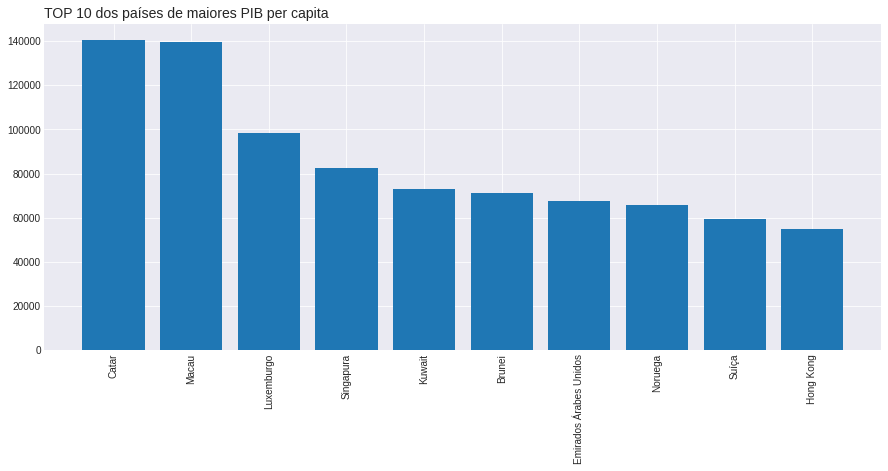

In [148]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-darkgrid')
plt.title('TOP 10 dos países de maiores PIB per capita', fontsize=14, loc='left')
plt.bar(top10['País'], top10['Int$'])
plt.xticks(rotation=90)
plt.show()